In [1]:
!pip freeze > requirements.txt

In [1]:
import os
import matplotlib.pyplot as plt

In [66]:
ds = '/kaggle/working/plantvillage_split_augmented/val'

In [67]:
class_counts = {}
for class_name in os.listdir(ds):
    class_path = os.path.join(ds, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

In [68]:
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

In [69]:
unwanted = ["Potato", "Pepper"]
for name in list(class_counts.keys()):
    if any(plant in name for plant in unwanted):
        class_counts.pop(name)

In [70]:
for cls, count in class_counts.items():
    print(f'{cls}: {count} images')

Tomato__Tomato_YellowLeaf__Curl_Virus: 482 images
Tomato_Bacterial_spot: 319 images
Tomato_Late_blight: 287 images
Tomato_Septoria_leaf_spot: 266 images
Tomato_Spider_mites_Two_spotted_spider_mite: 252 images
Tomato_healthy: 239 images
Tomato__Target_Spot: 211 images
Tomato_Early_blight: 151 images
Tomato_Leaf_Mold: 143 images
Tomato__Tomato_mosaic_virus: 56 images


# **Class Distribution**

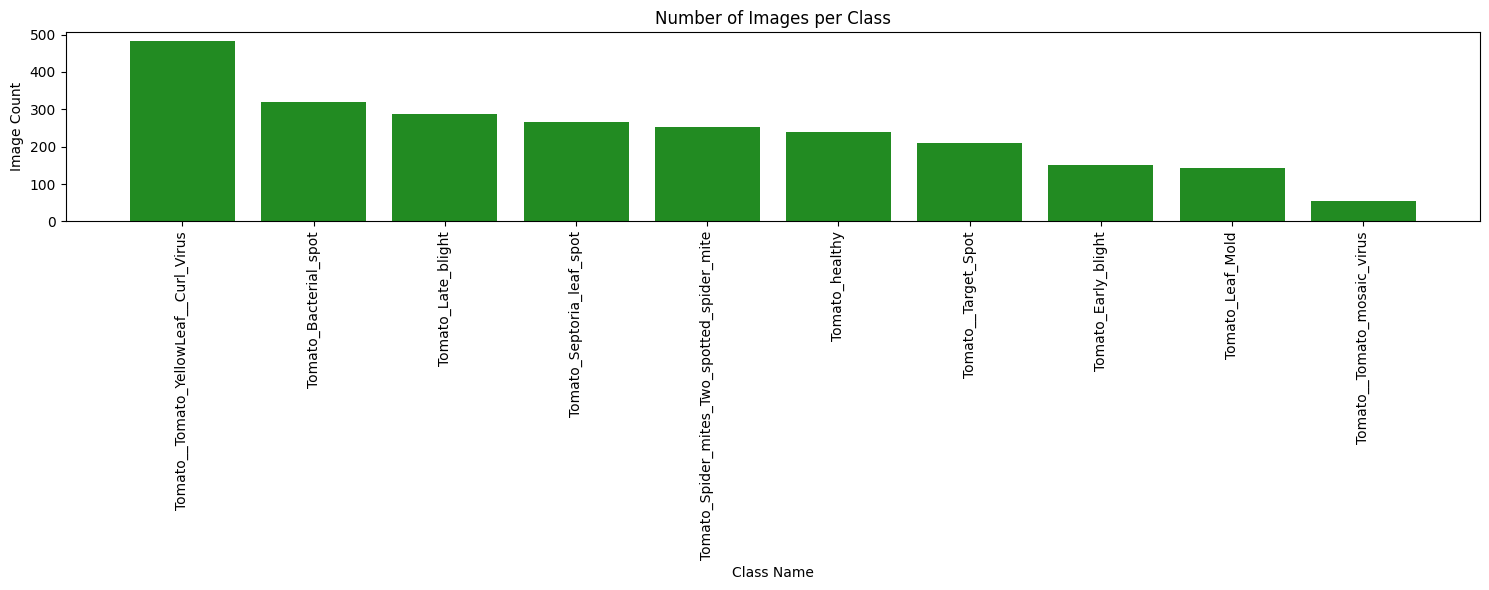

In [71]:
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen')
plt.xticks(rotation=90)
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()

# **Image Characteristics**

In [17]:
import cv2
import numpy as np

from collections import Counter

In [12]:
image_shapes = []
color_modes = []
file_extensions = []

In [15]:
for root, _, files in os.walk(ds):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)
            img = cv2.imread(file_path)
            if img is not None:
                # ขนาดภาพ
                h, w, c = img.shape
                image_shapes.append((w, h))
                
                # ช่องสี
                color_modes.append("RGB" if c == 3 else "Grayscale")
                
                # นามสกุลไฟล์
                ext = os.path.splitext(file)[1]
                file_extensions.append(ext)


In [18]:
shape_counts = Counter(image_shapes)
color_counts = Counter(color_modes)
ext_counts = Counter(file_extensions)

print("🔍 Image Sizes:")
for shape, count in shape_counts.items():
    print(f"{shape}: {count} images")

print("\n🎨 Color Modes:")
for mode, count in color_counts.items():
    print(f"{mode}: {count} images")

print("\n🖼️ File Extensions:")
for ext, count in ext_counts.items():
    print(f"{ext}: {count} images")

🔍 Image Sizes:
(256, 256): 156 images

🎨 Color Modes:
RGB: 156 images

🖼️ File Extensions:
.jpg: 154 images
.png: 1 images
.jpeg: 1 images


In [19]:
widths = [w for w, h in image_shapes]
heights = [h for w, h in image_shapes]

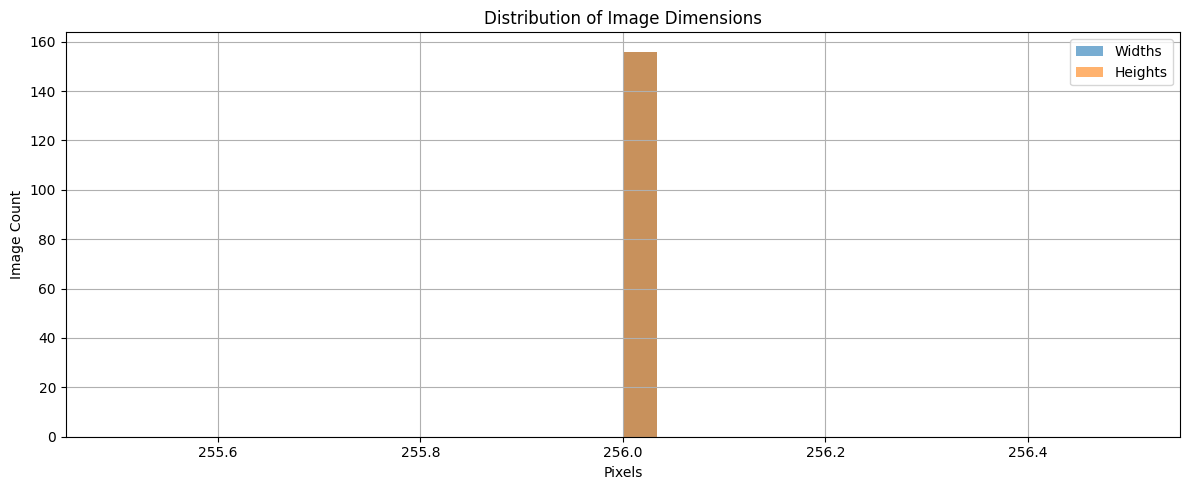

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(widths, bins=30, alpha=0.6, label='Widths')
plt.hist(heights, bins=30, alpha=0.6, label='Heights')
plt.legend()
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.ylabel("Image Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Data Quality**

In [156]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [157]:
blur_scores = []
dark_scores = []
noise_scores = []
bad_images = []
blurry_images_sample = []
dark_images_sample = []

In [158]:
def is_blurry(img, threshold=100.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lap_var = cv2.Laplacian(gray, cv2.CV_64F)
    return lap_var < threshold, lap_var

In [159]:
def is_dark(image, threshold=50):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    return mean_brightness < threshold, mean_brightness

In [160]:
def estimate_noise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = np.std(gray)
    return noise

In [162]:
for root, dirs, files in os.walk(ds):
    if 'Potato' in root or 'Pepper' in root:
        continue

    for file in tqdm(files):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, file)
            img = cv2.imread(path)

            if img is None:
                bad_images.append((path, 'Corrupted'))
                continue

            # Blur detection
            # blurry, score_blur = is_blurry(img)
            # blur_scores.append(score_blur)
            # if blurry:
            #     bad_images.append((path, f'Blurry: {score_blur:.2f}'))
            #     if len(blurry_images_sample) < 9:
            #         blurry_images_sample.append((img, path))

            # Dark detection
            dark, score_dark = is_dark(img)
            dark_scores.append(score_dark)
            if dark:
                bad_images.append((path, f'Dark: {score_dark:.2f}'))
                if len(dark_images_sample) < 9:
                    dark_images_sample.append((img, path))

            # Noise estimation
            score_noise = estimate_noise(img)
            noise_scores.append(score_noise)

0it [00:00, ?it/s]
100%|██████████| 3200/3200 [00:00<00:00, 2110673.50it/s]


ValueError: x must have 2 or fewer dimensions

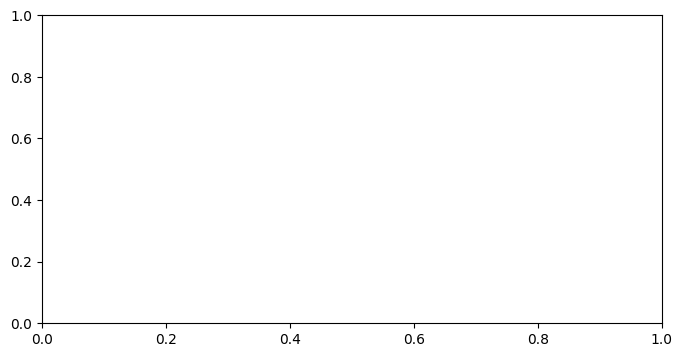

In [163]:
plt.figure(figsize=(8, 4))
plt.hist(blur_scores, bins=30, color='orange', edgecolor='black')
plt.title('Blur Score Distribution (Laplacian Variance)')
plt.xlabel('Blur Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

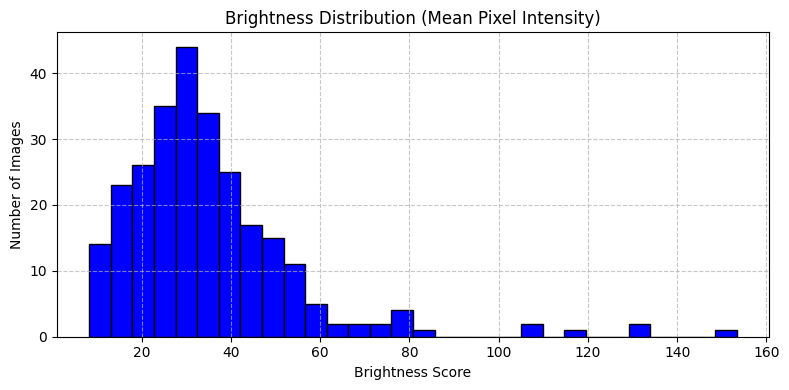

In [164]:
plt.figure(figsize=(8, 4))
plt.hist(dark_scores, bins=30, color='blue', edgecolor='black')
plt.title('Brightness Distribution (Mean Pixel Intensity)')
plt.xlabel('Brightness Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

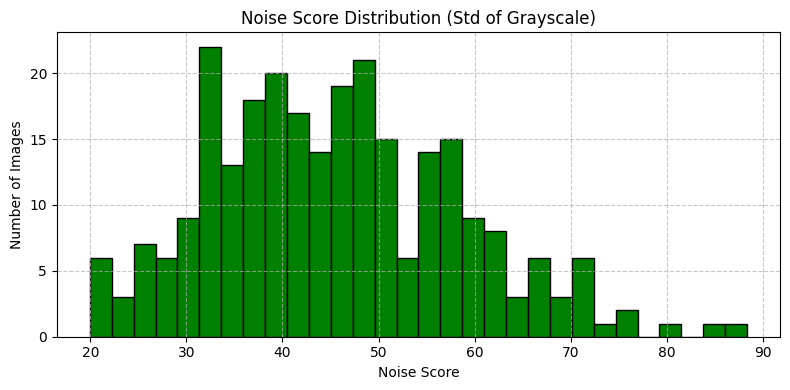

In [165]:
plt.figure(figsize=(8, 4))
plt.hist(noise_scores, bins=30, color='green', edgecolor='black')
plt.title('Noise Score Distribution (Std of Grayscale)')
plt.xlabel('Noise Score')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Train**

In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import time

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
BASE_DIR = "/kaggle/working/plantvillage_split_augmented"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "val")
TEST_DIR = os.path.join(BASE_DIR, "test")

In [13]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [14]:
train_data = datasets.ImageFolder(TRAIN_DIR, transform=train_transform)
val_data = datasets.ImageFolder(VAL_DIR, transform=val_test_transform)
test_data = datasets.ImageFolder(TEST_DIR, transform=val_test_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [15]:
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(train_data.classes))
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 141MB/s]


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [23]:
def train_model(num_epochs=10):
    print("Start")
    start_time = time.time()
    
    best_val_acc = 0.0
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
    
    for epoch in range(num_epochs):
        epoch_start = time.time()
        
        model.train()
        running_loss = 0.0
        correct = 0
        
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * imgs.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
        
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct / len(val_loader.dataset)

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")

        # Logging
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        # Time estimation
        epoch_duration = time.time() - epoch_start
        total_elapsed = time.time() - start_time
        eta = epoch_duration * (num_epochs - epoch - 1)
        
        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} | "
              f"Time/Epoch: {epoch_duration:.1f}s")

    total_time = time.time() - start_time
    print(f"✅ Training completed in {total_time/60:.2f} minutes.")

    return history

In [24]:
history = train_model(num_epochs=10)

Start
Epoch 1/10 | Train Loss: 0.0713 Acc: 0.9764 | Val Loss: 0.0427 Acc: 0.9888 | Time/Epoch: 274.6s
Epoch 2/10 | Train Loss: 0.0523 Acc: 0.9824 | Val Loss: 0.0411 Acc: 0.9892 | Time/Epoch: 273.2s
Epoch 3/10 | Train Loss: 0.0505 Acc: 0.9831 | Val Loss: 0.0432 Acc: 0.9850 | Time/Epoch: 272.8s
Epoch 4/10 | Train Loss: 0.0443 Acc: 0.9860 | Val Loss: 0.0423 Acc: 0.9871 | Time/Epoch: 274.2s
Epoch 5/10 | Train Loss: 0.0439 Acc: 0.9858 | Val Loss: 0.0292 Acc: 0.9875 | Time/Epoch: 273.8s
Epoch 6/10 | Train Loss: 0.0409 Acc: 0.9868 | Val Loss: 0.0239 Acc: 0.9921 | Time/Epoch: 274.4s
Epoch 7/10 | Train Loss: 0.0339 Acc: 0.9886 | Val Loss: 0.0352 Acc: 0.9855 | Time/Epoch: 273.9s
Epoch 8/10 | Train Loss: 0.0337 Acc: 0.9887 | Val Loss: 0.0346 Acc: 0.9909 | Time/Epoch: 274.4s
Epoch 9/10 | Train Loss: 0.0301 Acc: 0.9902 | Val Loss: 0.0182 Acc: 0.9933 | Time/Epoch: 275.4s
Epoch 10/10 | Train Loss: 0.0310 Acc: 0.9898 | Val Loss: 0.0451 Acc: 0.9846 | Time/Epoch: 274.9s
✅ Training completed in 45.69 min

In [25]:
model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))

<ipython-input-25-55445dfdbf8b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))


<All keys matched successfully>

In [26]:
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = outputs.argmax(1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())
print(classification_report(all_labels, all_preds, target_names=test_data.classes))

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       1.00      0.98      0.99       320
                        Tomato_Early_blight       1.00      0.96      0.98       150
                         Tomato_Late_blight       0.99      0.99      0.99       287
                           Tomato_Leaf_Mold       0.99      1.00      1.00       143
                  Tomato_Septoria_leaf_spot       0.97      1.00      0.98       266
Tomato_Spider_mites_Two_spotted_spider_mite       1.00      0.99      0.99       252
                        Tomato__Target_Spot       0.99      1.00      0.99       211
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      1.00      1.00       482
                Tomato__Tomato_mosaic_virus       0.97      1.00      0.98        56
                             Tomato_healthy       1.00      1.00      1.00       239

                                   accuracy                    

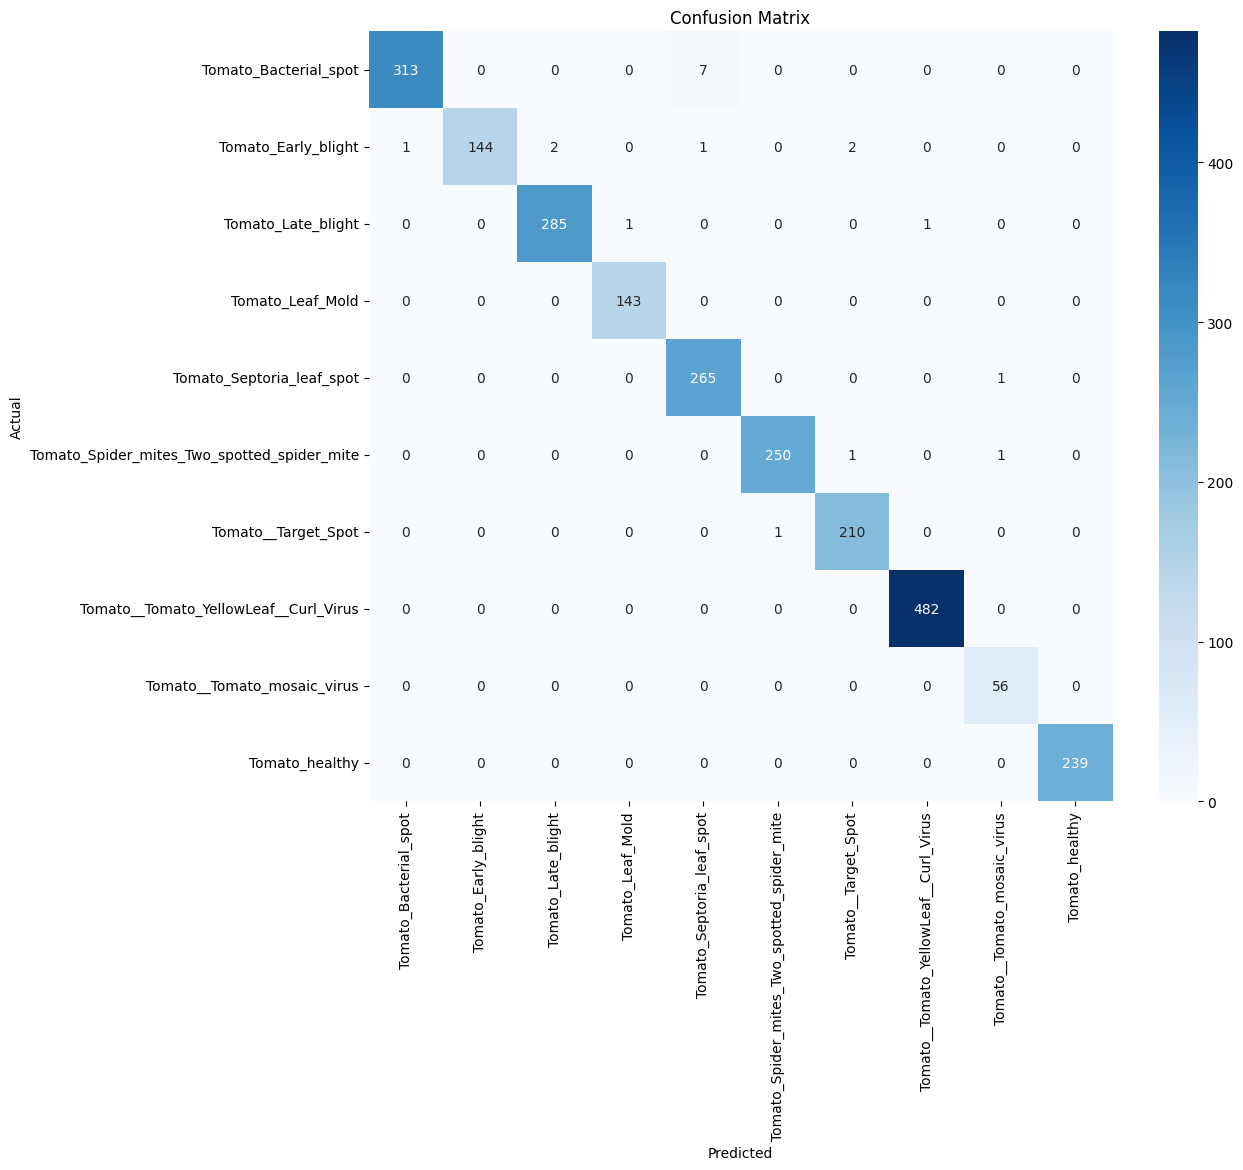

In [27]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.show()

# **Data Augmentation**

In [2]:
import os
import shutil
import random
from collections import defaultdict
from tqdm import tqdm
from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from sklearn.model_selection import train_test_split

In [3]:
DATA_DIR = "/kaggle/input/plantdisease/PlantVillage"
SPLIT_DIR = "/kaggle/working/plantvillage_split_augmented"
AUG_THRESHOLD = 3200
EXCLUDED_CLASSES = ['Potato', 'Pepper']
random.seed(42)

In [4]:
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

In [5]:
def should_skip_class(class_name):
    return any(ex in class_name for ex in EXCLUDED_CLASSES)

In [6]:
class_image_dict = defaultdict(list)
for class_name in os.listdir(DATA_DIR):
    if should_skip_class(class_name):
        continue
    class_path = os.path.join(DATA_DIR, class_name)
    if not os.path.isdir(class_path):
        continue
    for file in os.listdir(class_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_image_dict[class_name].append(os.path.join(class_path, file))

In [7]:
for class_name, paths in class_image_dict.items():
    train_val, test = train_test_split(paths, test_size=0.15, random_state=42)
    train, val = train_test_split(train_val, test_size=0.1765, random_state=42)  # 0.1765*0.85 ≈ 0.15

    for subset_name, subset in zip(['train', 'val', 'test'], [train, val, test]):
        subset_dir = os.path.join(SPLIT_DIR, subset_name, class_name)
        os.makedirs(subset_dir, exist_ok=True)
        for img_path in subset:
            shutil.copy(img_path, os.path.join(subset_dir, os.path.basename(img_path)))

In [9]:
train_dir = os.path.join(SPLIT_DIR, 'train')
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    count = len(images)
    
    if count >= AUG_THRESHOLD or should_skip_class(class_name):
        continue

    print(f"🔁 Augmenting class: {class_name} ({count} → {AUG_THRESHOLD})")
    num_to_generate = AUG_THRESHOLD - count

    for i in tqdm(range(num_to_generate), desc=f"Augmenting {class_name}"):
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert("RGB")
        augmented = augmentation_transform(img)

        aug_name = f"aug_{i}_{img_name}"
        aug_path = os.path.join(class_path, aug_name)
        augmented_pil = to_pil_image(augmented)
        augmented_pil.save(aug_path)

print("✅ Split and augmentation completed.")

✅ Split and augmentation completed.
